# CLASSIFYING NEWS TEXT INTO THE PREDEFINED LABELS

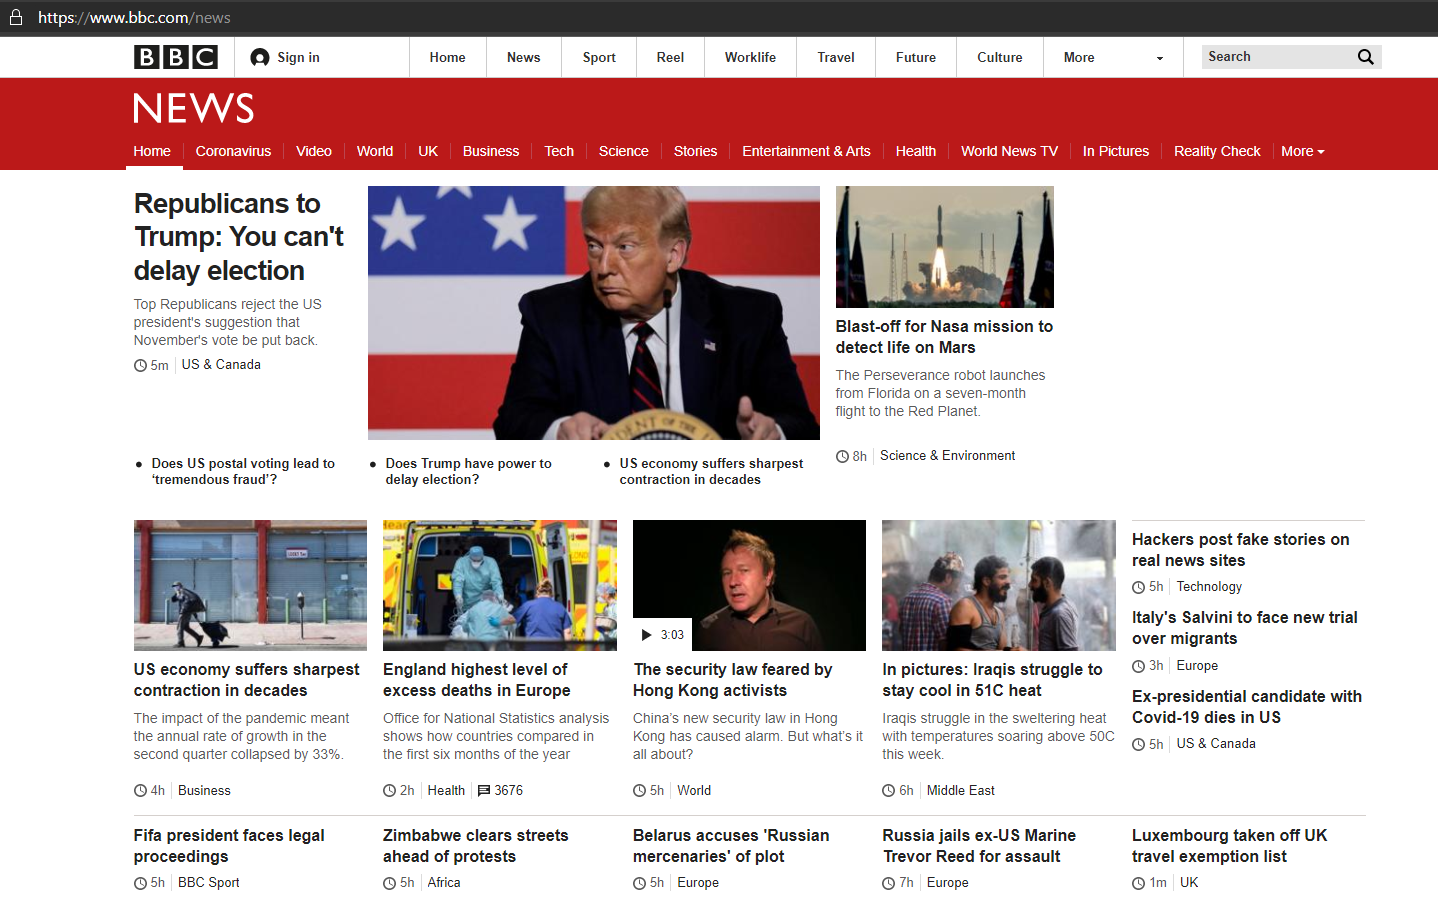

>You may have already noticed and used the categories in the news websites for accessing the topics that you would like to learn the associated recent developments. Categorizing a new content can be actually done autonomously using Supervised Learning, looking at the past news content and the labels: our ML model can predict the category of a given recent news, this method is particularly called the text classification.

>To illustrate, you can see above the individual news on the BBC News website and their labels such as Business, Health, World, Europe, etc. Using an open dataset called "BBC News Archive", we will be training a neural network predicting the labels of unseen news based on this labeled data set.

>We can treat this as a general ML problem by generating word indexes for each word in the news content, or we can be more spesific and consider the interrelations of the words by using pretrained word embeddings.

The original source of the data may be accessed through [this link ](http://mlg.ucd.ie/datasets/bbc.html)and it might be interesting to read the associated [research article](http://mlg.ucd.ie/files/publications/greene06icml.pdf). Before giving further details regarding the data, let's discover it together through an Exploratory Data Analysis (EDA).

# Exploratory Data Analysis (EDA)

Importing the required modules:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix

sns.set_style('darkgrid')

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import pandas as pd
TRAIN_FILEPATH = "../Translated/cleaned/train.csv"
TEST_FILEPATH = "../Translated/cleaned/test.csv"
SS_FILEPATH = "../data/SampleSubmission.csv"
VECTORS_FILEPATH = ""
df = pd.read_csv(TRAIN_FILEPATH)
test = pd.read_csv(TEST_FILEPATH)
ss = pd.read_csv(SS_FILEPATH)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1436 non-null   object
 1   Text    1436 non-null   object
 2   Label   1436 non-null   object
dtypes: object(3)
memory usage: 33.8+ KB


In [6]:
df.Label.value_counts()

POLITICS                279
SOCIAL                  152
RELIGION                147
LAW/ORDER               136
SOCIAL ISSUES           134
HEALTH                  127
ECONOMY                  86
FARMING                  78
SPORTS                   49
EDUCATION                43
RELATIONSHIPS            39
WILDLIFE/ENVIRONMENT     36
OPINION/ESSAY            26
LOCALCHIEFS              25
CULTURE                  23
WITCHCRAFT               16
MUSIC                    15
TRANSPORT                11
ARTS AND CRAFTS           7
FLOODING                  7
Name: Label, dtype: int64

In [7]:
stopwords = set(stopwords.words('english'))

In [8]:
set(list(stopwords)[0:15]) #showing only the first 15 elements of the stopwords set

{'against',
 'an',
 'down',
 'haven',
 'into',
 'me',
 "mightn't",
 'needn',
 "needn't",
 'now',
 'such',
 'then',
 'who',
 'whom',
 "you'd"}

In [9]:
len(stopwords)

179

In [11]:
contents_clean = []
for content_clean in df.Text:
    for word in stopwords:
        token = " " + word + " "
        content_clean = content_clean.replace(token, " ")
    contents_clean.append(content_clean)

In [12]:
df['content_clean'] = np.array(contents_clean)

In [13]:
df.head()

ID                                               Text      Label  \
0  ID_AASHwXxg   Mwangonde: Khansala wachinyamata Akamati achi...   POLITICS   
1  ID_AGoFySzn   MCP siidakhutire ndi kalembera Chipani cha Ma...   POLITICS   
2  ID_AGrrkBGP  Bungwe la MANEPO Lapempha Boma Liganizire Anth...     HEALTH   
3  ID_AIJeigeG   Ndale zogawanitsa miyambo zanyanya Si zachile...   POLITICS   
4  ID_APMprMbV   Nanga wapolisi ataphofomoka? Masiku ano sichi...  LAW/ORDER   

                                       content_clean  
0   Mwangonde: Khansala wachinyamata Akamati achi...  
1   MCP siidakhutire ndi kalembera Chipani cha Ma...  
2  Bungwe la MANEPO Lapempha Boma Liganizire Anth...  
3   Ndale zogawanitsa miyambo zanyanya Si zachile...  
4   Nanga wapolisi ataphofomoka? Masiku ano sichi...

In [15]:
len(df.content_clean[224])

1385

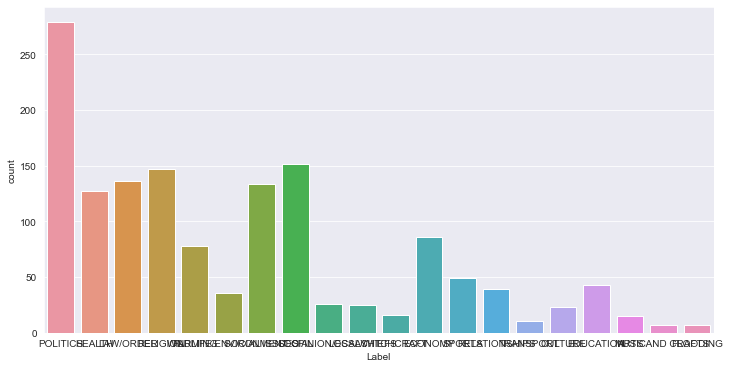

In [17]:
plt.figure(figsize = (12, 6))
sns.countplot(df.Label)

# Train-Test Split

In [18]:
X = list(df.content_clean)
y = list(df.Label)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, shuffle = True)

In [20]:
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique labels in the train set:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique labels in the train set:
[['ARTS AND CRAFTS' 'CULTURE' 'ECONOMY' 'EDUCATION' 'FARMING' 'FLOODING'
  'HEALTH' 'LAW/ORDER' 'LOCALCHIEFS' 'MUSIC' 'OPINION/ESSAY' 'POLITICS'
  'RELATIONSHIPS' 'RELIGION' 'SOCIAL' 'SOCIAL ISSUES' 'SPORTS'
  'TRANSPORT' 'WILDLIFE/ENVIRONMENT' 'WITCHCRAFT']
 ['6' '19' '66' '39' '61' '6' '99' '102' '21' '13' '18' '229' '32' '124'
  '121' '104' '35' '7' '33' '13']]


In [21]:
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique labels in the test set:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique labels in the test set:
[['ARTS AND CRAFTS' 'CULTURE' 'ECONOMY' 'EDUCATION' 'FARMING' 'FLOODING'
  'HEALTH' 'LAW/ORDER' 'LOCALCHIEFS' 'MUSIC' 'OPINION/ESSAY' 'POLITICS'
  'RELATIONSHIPS' 'RELIGION' 'SOCIAL' 'SOCIAL ISSUES' 'SPORTS'
  'TRANSPORT' 'WILDLIFE/ENVIRONMENT' 'WITCHCRAFT']
 ['1' '4' '20' '4' '17' '1' '28' '34' '4' '2' '8' '50' '7' '23' '31' '30'
  '14' '4' '3' '3']]


In [22]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1148
1148
288
288


# Transforming Article Text to Feature Vector

In [23]:
vocab_size = 15000
embedding_dim = 32
max_length = 256
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [24]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [25]:
X_train_sqncs = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sqncs, padding=padding_type, maxlen=max_length)

X_test_sqncs = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sqncs, padding=padding_type, maxlen=max_length)

print(len(X_test_sqncs))
print(X_test_padded.shape)

288
(288, 256)


In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()
y_train_new = le.fit_transform(train.Label)

In [27]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df.Label)
label_index = label_tokenizer.word_index

y_train_label_sqncs = np.array(label_tokenizer.texts_to_sequences(y_train))
y_test_label_sqncs = np.array(label_tokenizer.texts_to_sequences(y_test))

print(y_train_label_sqncs[0])
print(y_train_label_sqncs[1])
print(y_train_label_sqncs[2])
print(y_train_label_sqncs.shape)

print(y_test_label_sqncs[0])
print(y_test_label_sqncs[1])
print(y_test_label_sqncs[2])
print(y_test_label_sqncs.shape)
y_train = 

[3]
[2]
[4, 5]
(1148,)
[2]
[2]
[7]
(288,)


In [28]:
len(word_index)

43485

In [29]:
dict(list(word_index.items())[0:15]) #showing only the first 15 elements of the word_index dictionary

{'<OOV>': 1,
 'ndi': 2,
 'kuti': 3,
 'wa': 4,
 'pa': 5,
 'ya': 6,
 'la': 7,
 'anthu': 8,
 'ku': 9,
 'ndipo': 10,
 'za': 11,
 'kwa': 12,
 'koma': 13,
 'cha': 14,
 'ntchito': 15}

In [30]:
label_index

{'social': 1,
 'politics': 2,
 'religion': 3,
 'law': 4,
 'order': 5,
 'issues': 6,
 'health': 7,
 'economy': 8,
 'farming': 9,
 'sports': 10,
 'education': 11,
 'relationships': 12,
 'wildlife': 13,
 'environment': 14,
 'opinion': 15,
 'essay': 16,
 'localchiefs': 17,
 'culture': 18,
 'witchcraft': 19,
 'music': 20,
 'transport': 21,
 'arts': 22,
 'and': 23,
 'crafts': 24,
 'flooding': 25}

# Model

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 256, 32)           480000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1028)              33924     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                20580     
Total params: 534,504
Trainable params: 534,504
Non-trainable params: 0
_________________________________________________________________


In [51]:
# y_train_label_sqncs
(list(y_train_label_sqncs))

[[3],
 [2],
 [4, 5],
 [8],
 [7],
 [4, 5],
 [1, 6],
 [2],
 [4, 5],
 [2],
 [17],
 [18],
 [1, 6],
 [2],
 [3],
 [9],
 [9],
 [2],
 [2],
 [10],
 [4, 5],
 [18],
 [4, 5],
 [13, 14],
 [11],
 [9],
 [7],
 [4, 5],
 [2],
 [12],
 [15, 16],
 [4, 5],
 [2],
 [8],
 [11],
 [4, 5],
 [8],
 [2],
 [1, 6],
 [1],
 [1],
 [9],
 [7],
 [13, 14],
 [3],
 [19],
 [1],
 [3],
 [1, 6],
 [2],
 [4, 5],
 [20],
 [2],
 [3],
 [3],
 [1],
 [2],
 [2],
 [3],
 [3],
 [8],
 [9],
 [4, 5],
 [2],
 [3],
 [4, 5],
 [3],
 [12],
 [9],
 [8],
 [10],
 [2],
 [7],
 [1],
 [7],
 [12],
 [10],
 [8],
 [10],
 [2],
 [1, 6],
 [7],
 [1],
 [9],
 [2],
 [8],
 [2],
 [3],
 [1, 6],
 [12],
 [7],
 [12],
 [2],
 [2],
 [4, 5],
 [9],
 [7],
 [10],
 [4, 5],
 [3],
 [1, 6],
 [9],
 [21],
 [1],
 [11],
 [9],
 [9],
 [3],
 [1, 6],
 [8],
 [2],
 [2],
 [3],
 [2],
 [3],
 [1, 6],
 [2],
 [3],
 [2],
 [4, 5],
 [13, 14],
 [13, 14],
 [3],
 [7],
 [11],
 [3],
 [1],
 [3],
 [2],
 [1],
 [2],
 [15, 16],
 [12],
 [1],
 [9],
 [7],
 [2],
 [1, 6],
 [12],
 [2],
 [1],
 [7],
 [3],
 [3],
 [11],
 [1, 

In [52]:
num_epochs = 35
history = model.fit(X_train_padded, y_train_new, epochs=num_epochs, validation_split = 0.1, verbose=2)

Epoch 1/35
33/33 - 0s - loss: 2.8653 - accuracy: 0.1888 - val_loss: 2.6147 - val_accuracy: 0.1913
Epoch 2/35
33/33 - 0s - loss: 2.5994 - accuracy: 0.1994 - val_loss: 2.5472 - val_accuracy: 0.1913
Epoch 3/35
33/33 - 0s - loss: 2.5706 - accuracy: 0.1994 - val_loss: 2.5444 - val_accuracy: 0.1913
Epoch 4/35
33/33 - 0s - loss: 2.5540 - accuracy: 0.1994 - val_loss: 2.5499 - val_accuracy: 0.1913
Epoch 5/35
33/33 - 0s - loss: 2.5309 - accuracy: 0.1994 - val_loss: 2.5520 - val_accuracy: 0.1913
Epoch 6/35
33/33 - 0s - loss: 2.4948 - accuracy: 0.1994 - val_loss: 2.5678 - val_accuracy: 0.1913
Epoch 7/35
33/33 - 0s - loss: 2.4399 - accuracy: 0.1994 - val_loss: 2.5715 - val_accuracy: 0.1913
Epoch 8/35
33/33 - 0s - loss: 2.3460 - accuracy: 0.2004 - val_loss: 2.5972 - val_accuracy: 0.1913
Epoch 9/35
33/33 - 0s - loss: 2.2249 - accuracy: 0.2139 - val_loss: 2.6480 - val_accuracy: 0.1652
Epoch 10/35
33/33 - 0s - loss: 2.0915 - accuracy: 0.2507 - val_loss: 2.7195 - val_accuracy: 0.1304
Epoch 11/35
33/33 -

In [27]:
y_pred = model.predict_classes(X_test_padded)

In [28]:
X_test_padded

array([[  101, 13345,     3, ...,   168,   527,   148],
       [    2,   149,   552, ...,     0,     0,     0],
       [   45,   511, 11548, ...,     0,     0,     0],
       ...,
       [  502,   402,   111, ...,     0,     0,     0],
       [    2,    11,   516, ...,     0,     0,     0],
       [    1,  1739,   171, ...,     0,     0,     0]], dtype=int32)

In [29]:
y_pred

array([2, 2, 1, 2, 3, 1, 1, 3, 1, 3, 2, 5, 1, 2, 5, 2, 4, 5, 2, 5, 2, 1,
       2, 5, 2, 1, 5, 1, 3, 1, 1, 3, 4, 5, 2, 2, 2, 1, 4, 1, 4, 3, 2, 1,
       4, 4, 4, 2, 2, 4, 5, 2, 3, 2, 5, 3, 3, 3, 2, 2, 2, 2, 5, 2, 1, 5,
       2, 2, 3, 1, 3, 3, 4, 1, 2, 1, 1, 5, 2, 2, 1, 1, 2, 5, 5, 1, 1, 1,
       5, 1, 1, 2, 3, 2, 1, 2, 5, 5, 2, 3, 2, 3, 2, 2, 1, 3, 1, 4, 5, 3,
       2, 4, 5, 2, 3, 1, 5, 5, 5, 1, 5, 3, 2, 3, 4, 2, 4, 5, 2, 5, 1, 5,
       5, 1, 1, 3, 2, 2, 5, 4, 4, 2, 3, 2, 4, 5, 4, 2, 2, 3, 1, 5, 2, 4,
       4, 1, 1, 5, 2, 5, 4, 5, 2, 3, 4, 5, 2, 4, 4, 5, 1, 1, 4, 5, 1, 4,
       3, 3, 2, 1, 3, 1, 2, 3, 4, 1, 5, 1, 4, 2, 2, 1, 5, 4, 4, 5, 3, 3,
       1, 4, 1, 5, 2, 4, 2, 3, 1, 3, 1, 1, 1, 4, 4, 5, 1, 3, 4, 4, 2, 4,
       2, 3, 2, 5, 3, 3, 3, 3, 2, 5, 1, 1, 5, 2, 4, 1, 5, 2, 4, 4, 1, 2,
       3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 4, 2, 5, 1, 5, 1, 1, 1, 3, 4, 2, 5,
       1, 2, 3, 1, 2, 3, 2, 2, 2, 5, 2, 1, 5, 3, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 1, 2, 4, 2, 5, 2, 5, 3, 2, 2, 4, 2, 4, 1,

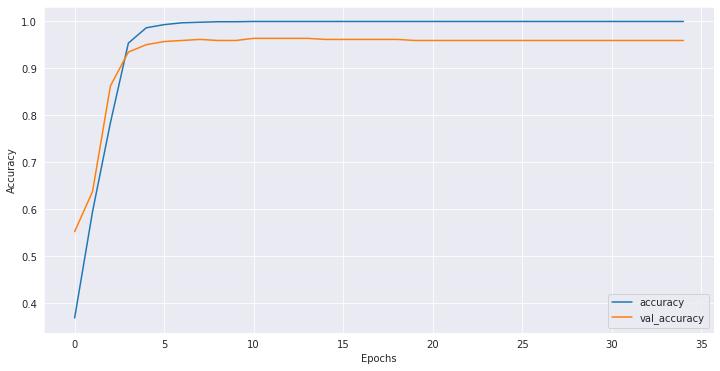

In [30]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

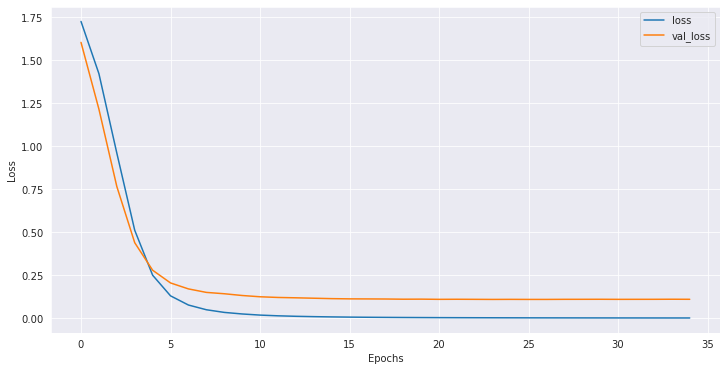

In [31]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

In [32]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_content(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

reverse_label_index = dict([(value, key) for (key, value) in label_index.items()])

def decode_labels(text):
    text = np.array([text])
    return ' '.join([reverse_label_index.get(i, '?') for i in text])

### Checking a few articles and their category:

#### News Article 1

In [33]:
X_test[1]

' The London Stock Exchange (LSE) planning announce preferred takeover end month, newspaper reports claim.  The Sunday Telegraph said LSE\'s plan evidence wants retain tight control destiny. Both Deutsche Boerse rival Euronext held talks London market last week possible offer. A £1.3bn offer Deutsche Boerse already rejected, Euronext said make cash bid. Speculation suggests Paris-based Euronext facilities place make bid £1.4bn, German rival may bid £1.5bn mark. Neither yet tabled formal bid, LSE expected hold talks two parties later week. However, Sunday Telegraph report added signs Deutsche Boerse chief executive Werner Seifert becoming increasingly impatient LSE\'s managed bid process.  Despite insisting wants agree recommended deal LSE\'s board, newspaper suggested may pull process put offer directly shareholders instead. The newspaper also claimed Mr Seifert becoming "increasingly frustrated" pace negotiations since Deutsche Boerse\'s £1.3bn offer rejected mid-December, particular 

In [34]:
y_test[1]

'business'

In [35]:
decode_content(X_test_padded[1])

"the london stock exchange lse planning announce preferred takeover end month newspaper reports claim the sunday telegraph said lse's plan evidence wants retain tight control destiny both deutsche boerse rival euronext held talks london market last week possible offer a £1 3bn offer deutsche boerse already rejected euronext said make cash bid speculation suggests paris based euronext facilities place make bid £1 4bn german rival may bid £1 5bn mark neither yet tabled formal bid lse expected hold talks two parties later week however sunday telegraph report added signs deutsche boerse chief executive werner seifert becoming increasingly <OOV> lse's managed bid process despite insisting wants agree recommended deal lse's board newspaper suggested may pull process put offer directly shareholders instead the newspaper also claimed mr seifert becoming increasingly frustrated pace negotiations since deutsche boerse's £1 3bn offer rejected mid december particular lse's decision suspend talks c

In [36]:
decode_labels(y_pred[1])

'business'

#### News Article 2:

In [37]:
X_test[34]

' The US dollar\'s slide euro yen halted US Treasury Secretary John Snow said strong dollar "in America\'s interest".  But analysts said gains likely short-lived problems US economy still significant. They also pointed positive comments apart, President George W Bush\'s administration done little stop dollar\'s slide. A weak dollar helps boost exports narrow current account deficit. The dollar trading $1.2944 euro 2100GMT, still close $1.3006 record level set 10 November. Against Japanese yen, trading 105.28 yen, hitting seven-month low 105.17 earlier day.  Policy makers Europe called dollar\'s slide "brutal" blamed strength euro dampening economic growth. However, unclear whether ministers would issue declaration aimed curbing euro\'s rise monthly meeting Eurozone ministers late Monday. Higher growth Europe regarded US officials way huge US current account deficit - weighing dollar - could reduced. Mr Snow currently Dublin start four-nation EU visit, applauded Ireland\'s introduction 

In [38]:
y_test[34]

'business'

In [39]:
decode_content(X_test_padded[34])

"short lived problems us economy still significant they also pointed positive comments apart president george w bush's administration done little stop dollar's slide a weak dollar helps boost exports narrow current account deficit the dollar trading 1 <OOV> euro <OOV> still close 1 <OOV> record level set 10 november against japanese yen trading 105 28 yen hitting seven month low 105 17 earlier day policy makers europe called dollar's slide brutal blamed strength euro <OOV> economic growth however unclear whether ministers would issue declaration aimed <OOV> euro's rise monthly meeting eurozone ministers late monday higher growth europe regarded us officials way huge us current account deficit <OOV> dollar could reduced mr snow currently dublin start four nation eu visit <OOV> ireland's introduction lower taxes <OOV> helped boost growth the eurozone growing potential when major part global economy potential negative consequences citizens economies trading partners said mr <OOV> comments

In [40]:
decode_labels(y_pred[34])

'business'

#### News Article 3:

In [41]:
X_test[400]

' Virus writers trading interest David Beckham distribute malicious wares.  Messages circulating widely purport evidence England captain compromising position. But anyone visiting website mentioned message see pictures Mr Beckham computer infected virus. The pernicious program opens backdoor computer controlled remotely malicious hackers.  The appearance Beckham Windows trojan another example long line viruses trade interest celebrities attempt fuel spread. Tennis player Anna Kournikova, popstars Britney Spears Avril Lavigne well Arnold Schwarzenegger used past try con people opening infected files. The huge amount interest Mr Beckham private life large number messages posted discussion groups net might mean malicious program catches lot people out. "The public\'s appetite salacious gossip private life Beckhams might lead unpleasant computer infection," said Graham Cluley anti-virus firm Sophos. Simply opening message infect user\'s PC. But anyone visiting website mentions downloads op

In [42]:
y_test[400]

'tech'

In [43]:
decode_content(X_test_padded[400])

"virus writers trading interest david beckham distribute malicious wares messages circulating widely purport evidence england captain <OOV> position but anyone visiting website mentioned message see pictures mr beckham computer infected virus the <OOV> program opens backdoor computer controlled remotely malicious hackers the appearance beckham windows trojan another example long line viruses trade interest celebrities attempt fuel spread tennis player anna <OOV> <OOV> britney spears avril lavigne well arnold <OOV> used past try con people opening infected files the huge amount interest mr beckham private life large number messages posted discussion groups net might mean malicious program <OOV> lot people out the <OOV> appetite <OOV> gossip private life beckhams might lead <OOV> computer infection said graham cluley anti virus firm sophos simply opening message infect user's pc but anyone visiting website mentions downloads opens fake image file stored site infected the program <OOV> ca

In [44]:
decode_labels(y_pred[400])

'tech'

In [45]:
df.category.drop_duplicates().values

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

Text(0.5, 69.0, 'Predicted')

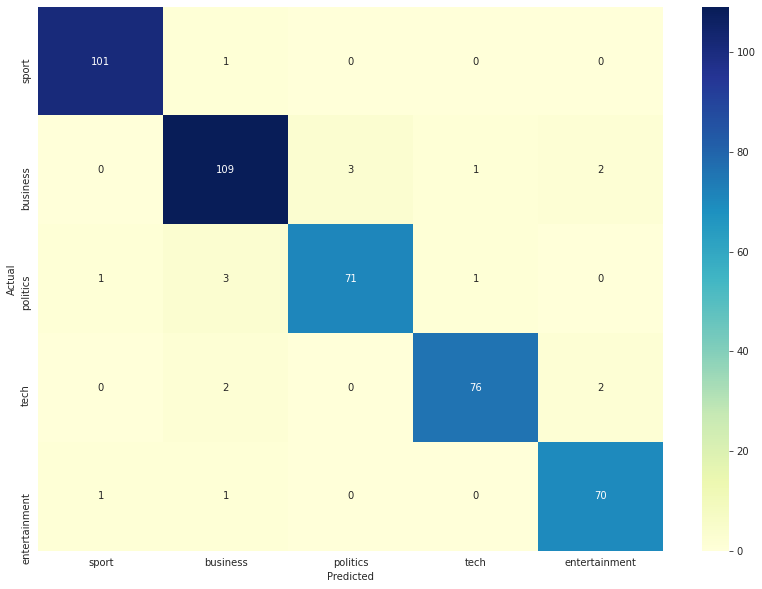

In [46]:
plt.figure(figsize=(14,10))
conf_mat = confusion_matrix(y_test_label_sqncs, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=list(label_index.keys()), yticklabels=list(label_index.keys()))
plt.ylabel('Actual')
plt.xlabel('Predicted')

The result seems quite satisfying, of course we had a pretty clean text data set with plain English written by the professional journalists, however this is not always the case. For example, if we were to categorize indivudual items in a retail website, where the content was created by distinct sellers, then we might have needed to perform a detalied text processing! However, for the purposes of this notebook, we do not need much of a preprocessing, nevertheless it could be good practice to utilize pretrained word embeddings that is trained on a larger corpus with much fair generalization of the word vector representations! 